<a href="https://colab.research.google.com/github/johan92lee/z2m-tf-tutorials/blob/main/02_neural_network_classification_with__tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

Types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

This notebook follows z2m tutorial video.

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


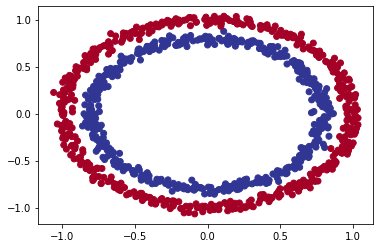

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
X[10], y[10]

(array([-0.64249042, -0.54409929]), 1)

## Steps in modelling

Create or import a model > compile a model > fit the model > evaluate the model > tweak > evaluate > tweak....

In [9]:
# Import tensorflow 
import tensorflow as tf


In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                 optimizer= tf.keras.optimizers.SGD(),
                 metrics=["accuracy"])
 
# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Let's try and improve our model by training it longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Let's try to add an extra layer

In [12]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)])

# Compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.4860


[0.7177660465240479, 0.4860000014305115]

## Improve our model

Lets look into how we can improve our model.

1. Create a model - we may wanna add more layer or increase number of hidden units
2. Compileing a model - here we might choose a different optimization functons
3. Fitting a model - we may fit our model and training it longer

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(1)])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4820


[0.6931542158126831, 0.4819999933242798]

To visualize our model's predictions, let's create a function plot_decision_boundary(), this function will:

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of different X values
* Make predicions across the meshgrid
* Plot the predictions as well as a line between zones

In [16]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make the predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


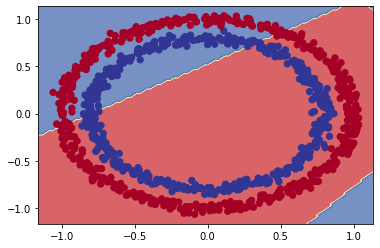

In [17]:
# Check out the prediction
plot_decision_boundary(model=model_3,
                       X= X,
                       y= y)

In [18]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max

(-1.1595024599098636, 1.1337117525463374)

## The key point: Non-linearity

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation="linear")])

# Compile the mode
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.0001),
                metrics= "accuracy")

# Fit the model
model_4.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 975us/step - loss: 4.0183 - accuracy: 0.4210


[4.01830530166626, 0.42100000381469727]

doing binary classification


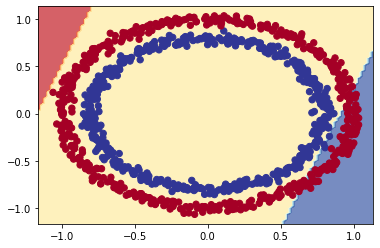

In [21]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

In [22]:
# Try another model parameter

# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")])

# Compile the model
model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the mode
model_6.fit(X, y, epochs=250, verbose=0)

In [23]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593363776803017, 0.9919999837875366]

doing binary classification


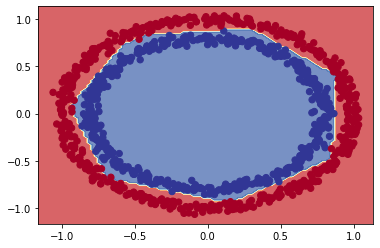

In [24]:
plot_decision_boundary(model= model_6, X=X, y=y)

## Evaluating and improving our classification

In [25]:
# Split into train test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [26]:
# Lets recreate a model to fot on the training datya and evalute on the test data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")])


model_8.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [27]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


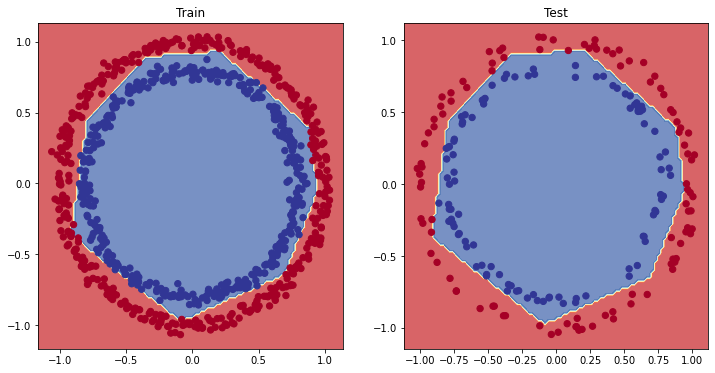

In [28]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X= X_train, y= y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X= X_test, y= y_test)

## Plot the loss curve

In [29]:
# Convert the history into Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curve')

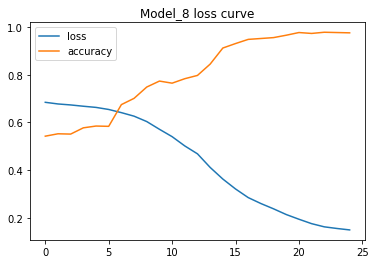

In [30]:
# PLot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss dfecvreases thew mode during training) we're going to use the following steps:
* A learning rate **callback**
* Another model
* A modified loss curve plot

In [31]:
# Set random seed
tf.random.set_seed(42)

# build the model
model_9 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation= "relu"),
                               tf.keras.layers.Dense(4, activation= "relu"),
                               tf.keras.layers.Dense(1, activation= "sigmoid")])

model_9.compile (loss="binary_crossentropy",
                 optimizer= "Adam",
                 metrics= ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs= 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

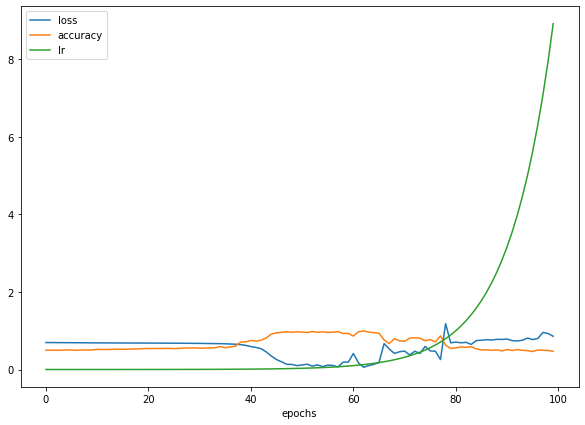

In [32]:
# Check the history
pd.DataFrame(history_9.history).plot(figsize= (10, 7), xlabel="epochs") 

Text(0.5, 1.0, 'learning rate vs loss')

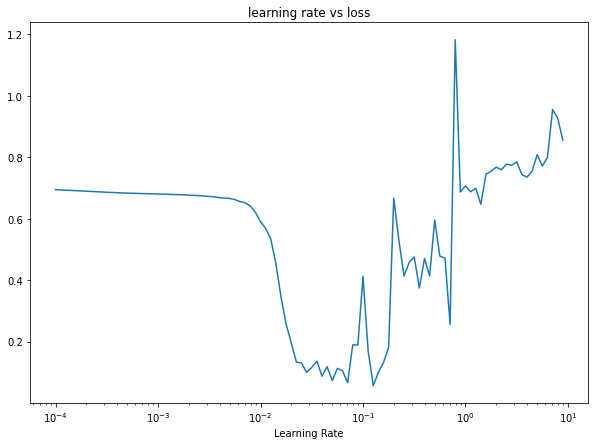

In [33]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10**(tf.range(100)/20))

plt.figure(figsize= (10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel('Learning Rate')
plt.title("learning rate vs loss")

In [34]:
# Example of other typical learning values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [35]:
# Lets try using a higher *ideal* learning rate wit hteh same model

#Set random seed
tf.random.set_seed(42)

# Create the model
model_10  = tf.keras.Sequential([tf.keras.layers.Dense(4, activation= "relu"),
                                 tf.keras.layers.Dense(4, activation= "relu"),
                                 tf.keras.layers.Dense(1, activation= "sigmoid")])

# Compile the model with the learning rate
model_10.compile(loss= "binary_crossentropy",
                 optimizer= tf.keras.optimizers.Adam(lr=0.02),
                 metrics= ["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

doing binary classification
doing binary classification


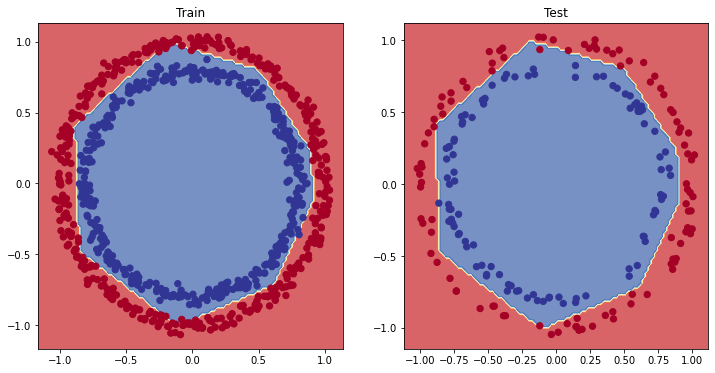

In [36]:
# Plot the decision boundaries for the trainign adn test sets

plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X= X_train, y= y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X= X_test, y= y_test)

plt.show()

## More classification evaluation methods

Alongside visualizing our models resutls as much as possible, ther are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Cofusion matrix
* Classification report (from scikit-learn)

In [37]:
# Checkj the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


### How about a confusion matrix

In [40]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

In [41]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [42]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

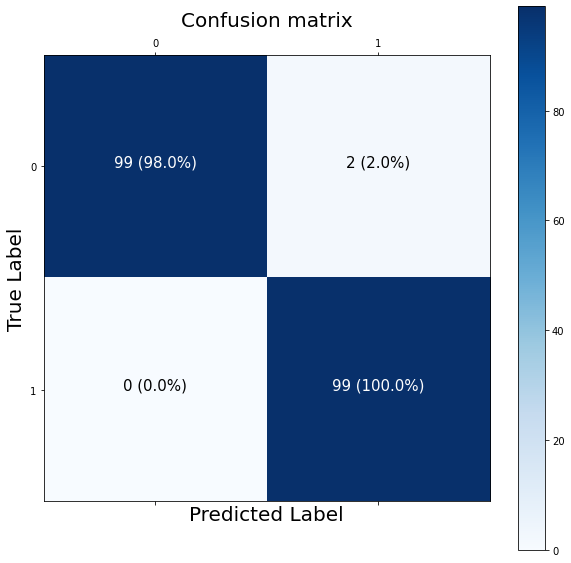

In [43]:
import itertools

figsize = (10, 10)

# Create the consfusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize= figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title= "Confusion matrix",
       xlabel= "Predicted Label",
       ylabel= "True Label",
       xticks= np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels= labels,
       yticklabels= labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for differnt colors
threshold = (cm.max() + cm.min())/ 2.

# Plot the test on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i,j]} ({cm_norm[i, j]* 100:.1f}%)",
           horizontalalignment="center",
           color= "white" if cm[i, j] > threshold else "black",
           size=15)


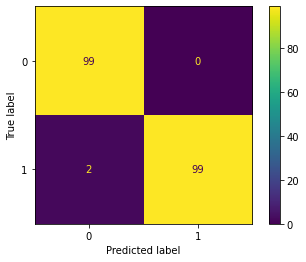

In [44]:
from  sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(tf.round(y_preds), y_test)
cmd = ConfusionMatrixDisplay(cm, [0, 1])

cmd.plot()

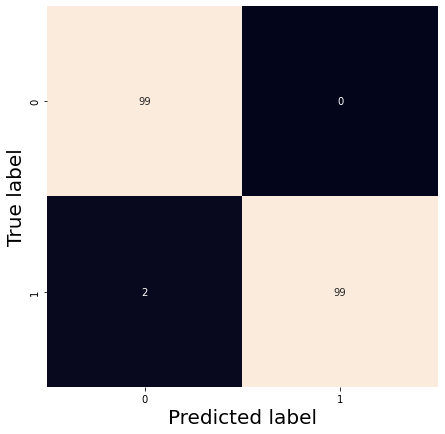

In [45]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(confusion_matrix(tf.round(y_preds), y_test),
                     annot=True, # Annotate the boxes
                     cbar=False)
plt.xlabel("Predicted label") # predictions go on the x-axis
plt.ylabel("True label") # true labels go on the y-axis 

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)


## Working with a larger example (multiclass classification)

When you have more than 2 classes as an option, it's known as **multiclass classification.

To practice multiclass classification , we're going to build a neural network to classify images of different items

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [47]:
# Show teh first training example
print(f"Training samples:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training samples:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [49]:
train_data[0].shape

(28, 28)

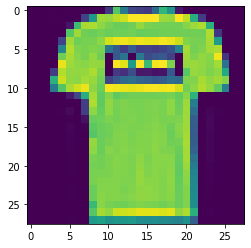

In [51]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [55]:
# Check out samples label
train_labels[1]

0

In [56]:
# Create a small list so we can indfex onto our trianing labels so they're human-readable
class_names =["T-shirt/Top", "Trousers", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Sneakers", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Sandals')

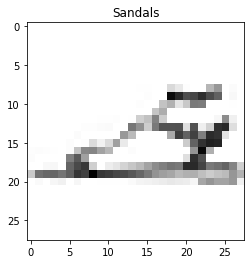

In [60]:
# Plot an example image and its label
index = 300
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

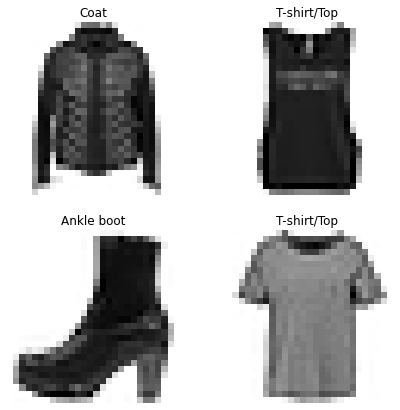

In [62]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Bulding a multi-class classification model

For our multiclass claissification model, we can use a similar architecture to our binary classifier, however we need to tweak a few things:
* Input shape = 28 x 28
* Output shape = 10 
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If labels are onehot encoded, otherwise use SparseCategoricalCrossentropy()
* Output layer activation = softmax

In [69]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# Compile the model
model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), 
                                epochs= 10, 
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy: